In [1]:
import numpy as np
import pandas as pd
from absl import app
from absl import flags
from typing import Sequence
import matplotlib.pyplot as plt

In [2]:
# import os
# os.listdir("../ptest/")

In [3]:
_N_ITEMS = 1000
_K_RESPONSES = 5
distortion_values = [0.005, 0.01, 0.02, 0.1]

In [4]:
def gather_data(_N_ITEMS, _K_RESPONSES, distortion_values):
    final_table = pd.DataFrame()
    for distortion in distortion_values:
        experiment_results = pd.read_csv(f'../ptest/results_N={_N_ITEMS}_K={_K_RESPONSES}_cat_responses_simulated_distr_dist={distortion}_gen_N={_N_ITEMS}_K={_K_RESPONSES}_M=3_num_samples=1000.pkl.csv')
        intermediate_table = pd.DataFrame()
        intermediate_table['$\\Delta$'] = (experiment_results['M2 GT Alt'] - experiment_results['M1 GT Alt']).abs()
        intermediate_table['p-value'] = experiment_results['GT_Pvalue']
        # intermediate_table['Metric'] = ['$\\Gamma_{\\rm Accuracy}$', '$\\Gamma_{\\rm F1-score}$']
        intermediate_table['Metric'] = ['Accuracy', 'F1-score', 'MAE']
        intermediate_table[f'$\\epsilon$'] = distortion
        final_table = pd.concat([final_table, intermediate_table])

    final_table = final_table.melt(["Metric", "$\\epsilon$"]).sort_values(by=["Metric","variable"]).pivot(index = "$\\epsilon$", columns=["Metric","variable"])
    # final_table = final_table.reset_index(drop=True)
    final_table = final_table.reset_index()
    final_table.columns = pd.MultiIndex.from_tuples([(j,k) for i,j,k in final_table.columns])
    final_table.columns = ['_'.join(col) for col in final_table.columns]
    final_table["N"] = pd.Series([_N_ITEMS]*len(distortion_values))
    final_table["K"] = pd.Series([_K_RESPONSES]*len(distortion_values))
    final_table["NxK"] = final_table["N"]*final_table["K"]

    return final_table

In [5]:
final_table = gather_data(_N_ITEMS, _K_RESPONSES, distortion_values)
print(_N_ITEMS, _K_RESPONSES)
final_table

1000 5


,_,Accuracy_$\Delta$,Accuracy_p-value,F1-score_$\Delta$,F1-score_p-value,MAE_$\Delta$,MAE_p-value,N,K,NxK
0,0.005,0.000409,0.484743,0.000409,0.484595,0.000625,0.516018,1000,5,5000
1,0.010,0.001450,0.472357,0.001450,0.472234,0.003606,0.467924,1000,5,5000
2,0.020,0.002948,0.461718,0.002948,0.461640,0.007301,0.418178,1000,5,5000
3,0.100,0.015043,0.274428,0.015043,0.274382,0.042923,0.112114,1000,5,5000


In [6]:
# pd.concat([gather_data(1000, k, distortion_values) for k in [5, 10, 25, 50, 100]])

In [7]:
# final_table.to_csv("'../ptest/final_table.csv", index=False)

In [8]:
all_values = [(n,k) for n in [10, 25, 50, 100, 250, 500, 1000, 2000] for k in [1, 5, 10, 25, 50, 100]]
# all_values = [(n,k) for n in [1000] for k in [1, 5, 10, 25, 50, 100]]
# all_values = [(n,k) for n in [10, 25, 50, 100, 250, 500, 1000, 2000] for k in [5]]

def get_n_k_for_num_ratings(all_values, num_ratings):
    values=[]
    for x in all_values:
        if x[0]*x[1]==num_ratings:
            values.append((x[0], x[1]))
    return values
# values_2500 = [x if x[0]*x[1]==2500 else (0,0) for x in all_values]
values_2500 = get_n_k_for_num_ratings(all_values, 2500)
print(values_2500)

[(25, 100), (50, 50), (100, 25), (250, 10), (500, 5)]


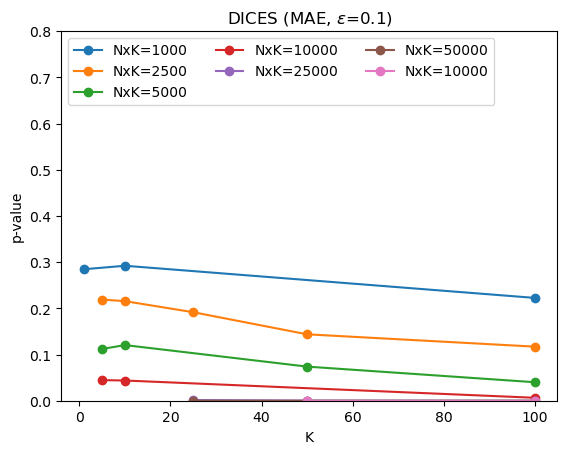

In [9]:
distortion = 0.1
# metric = "Accuracy"
# metric = "F1-score"
metric = "MAE"

df_ratings_1000 = pd.concat([gather_data(n, k, [distortion]) for n,k in get_n_k_for_num_ratings(all_values, 1000)])
df_ratings_2500 = pd.concat([gather_data(n, k, [distortion]) for n,k in get_n_k_for_num_ratings(all_values, 2500)])
df_ratings_5000 = pd.concat([gather_data(n, k, [distortion]) for n,k in get_n_k_for_num_ratings(all_values, 5000)])
df_ratings_10000 = pd.concat([gather_data(n, k, [distortion]) for n,k in get_n_k_for_num_ratings(all_values, 10000)])
df_ratings_25000 = pd.concat([gather_data(n, k, [distortion]) for n,k in get_n_k_for_num_ratings(all_values, 25000)])
df_ratings_50000 = pd.concat([gather_data(n, k, [distortion]) for n,k in get_n_k_for_num_ratings(all_values, 50000)])
df_ratings_100000 = pd.concat([gather_data(n, k, [distortion]) for n,k in get_n_k_for_num_ratings(all_values, 100000)])

# df_ratings_2500
# df_all_results = pd.concat([df_ratings_1000, df_ratings_2500, df_ratings_5000, df_ratings_10000, df_ratings_25000, df_ratings_50000, df_ratings_100000])
# df_all_results.head()

plt.plot(df_ratings_1000["K"], df_ratings_1000[f"{metric}_p-value"], marker='o', label='NxK=1000')
plt.plot(df_ratings_2500["K"], df_ratings_2500[f"{metric}_p-value"], marker='o', label='NxK=2500')
plt.plot(df_ratings_5000["K"], df_ratings_5000[f"{metric}_p-value"], marker='o', label='NxK=5000')
plt.plot(df_ratings_10000["K"], df_ratings_10000[f"{metric}_p-value"], marker='o', label='NxK=10000')
plt.plot(df_ratings_25000["K"], df_ratings_25000[f"{metric}_p-value"], marker='o', label='NxK=25000')
plt.plot(df_ratings_50000["K"], df_ratings_50000[f"{metric}_p-value"], marker='o', label='NxK=50000')
plt.plot(df_ratings_100000["K"], df_ratings_100000[f"{metric}_p-value"], marker='o', label='NxK=10000')
plt.xlabel('K')
plt.ylabel('p-value')
plt.ylim((0,0.8))
plt.title(f"DICES ({metric}, $\\epsilon$={distortion})")
plt.legend(loc='upper left', ncols=3)
plt.savefig(f"../ptest/plots/DICES_{metric}_epsilon={distortion}.png")

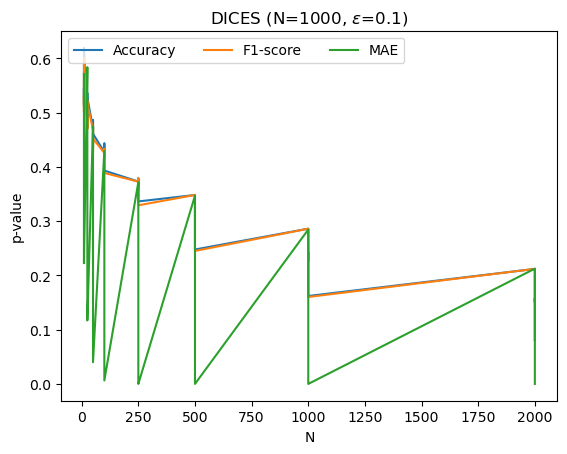

In [10]:
all_values
df_ratings_1000 = pd.concat([gather_data(n, k, [distortion]) for n,k in all_values])
df_ratings_1000.head()
plt.figure()
plt.plot(df_ratings_1000["N"], df_ratings_1000["Accuracy_p-value"], label='Accuracy')
plt.plot(df_ratings_1000["N"], df_ratings_1000["F1-score_p-value"], label='F1-score')
plt.plot(df_ratings_1000["N"], df_ratings_1000["MAE_p-value"], label='MAE')
plt.xlabel('N')
plt.ylabel('p-value')
# plt.ylim((0,0.8))
plt.title(f"DICES (N=1000, $\\epsilon$={distortion})")
plt.legend(loc='upper left', ncols=3)

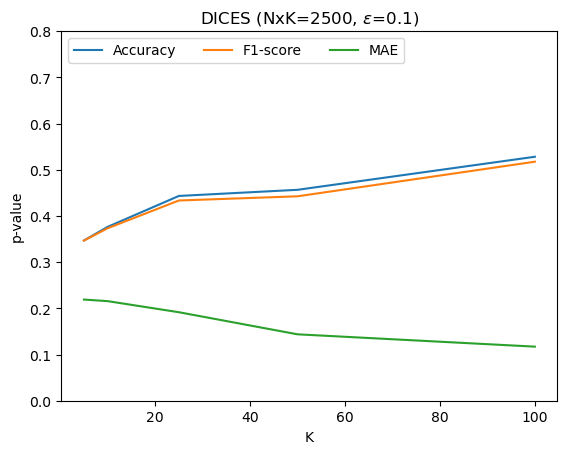

In [11]:
plt.figure()
plt.plot(df_ratings_2500["K"], df_ratings_2500["Accuracy_p-value"], label='Accuracy')
plt.plot(df_ratings_2500["K"], df_ratings_2500["F1-score_p-value"], label='F1-score')
plt.plot(df_ratings_2500["K"], df_ratings_2500["MAE_p-value"], label='MAE')
plt.xlabel('K')
plt.ylabel('p-value')
plt.ylim((0,0.8))
plt.title(f"DICES (NxK=2500, $\\epsilon$={distortion})")
plt.legend(loc='upper left', ncols=3)
plt.savefig(f"../ptest/plots/DICES_NxK=2500_epsilon={distortion}.png")

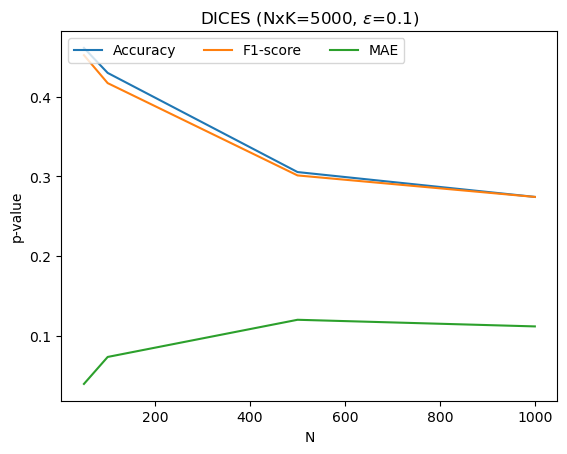

In [12]:
plt.figure()
plt.plot(df_ratings_5000["N"], df_ratings_5000["Accuracy_p-value"], label='Accuracy')
plt.plot(df_ratings_5000["N"], df_ratings_5000["F1-score_p-value"], label='F1-score')
plt.plot(df_ratings_5000["N"], df_ratings_5000["MAE_p-value"], label='MAE')
plt.xlabel('N')
plt.ylabel('p-value')
# plt.ylim((0,0.8))
plt.title(f"DICES (NxK=5000, $\\epsilon$={distortion})")
plt.legend(loc='upper left', ncols=3)
plt.savefig(f"../ptest/plots/DICES_NxK=5000_epsilon={distortion}.png")

In [13]:
# import seaborn as plt

# plt.lineplot(data=df_all_results, x="K", y="Accuracy_p-value", hue="NxK", markers=True)

In [14]:
import parameterized_sample_lib as psample
response_sets = psample.read_samples_from_file("../ptest/cat_responses_simulated_distr_dist=0.05_gen_N=350_K=123_M=3_num_samples=1.pkl", True)


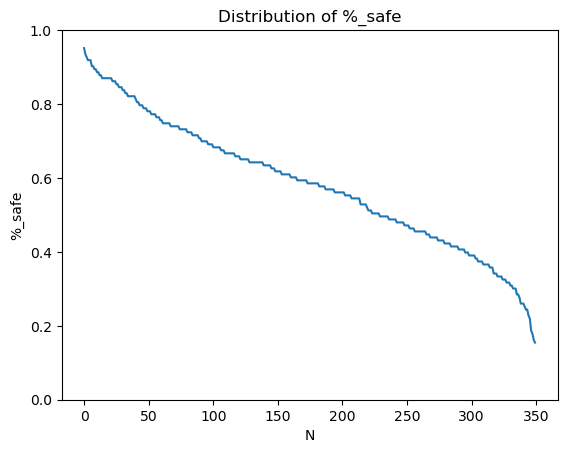

In [15]:
dices_simulated_data = response_sets.alt_data_list[0].gold
# print(dices_simulated_data)
per_safe_responses = np.mean(dices_simulated_data == 0, axis=-1)
sorted_per_safe_responses = np.sort(per_safe_responses)[::-1]
sorted_per_safe_responses
plt.figure()
plt.plot(sorted_per_safe_responses)
# plt.bar(range(1,351),sorted_per_safe_responses)
plt.xlabel('N')
plt.ylabel('%_safe')
plt.ylim((0,1))
plt.title(f"Distribution of %_safe")
plt.savefig(f"../ptest/plots/DICES_dist_%_safe.png")